In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

C:\Users\nikit\AppData\Local\Temp\ipykernel_22960\3769964826.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.lineplot(x="length", y="dwt", hue = "ship_name", data=file, ci = None)


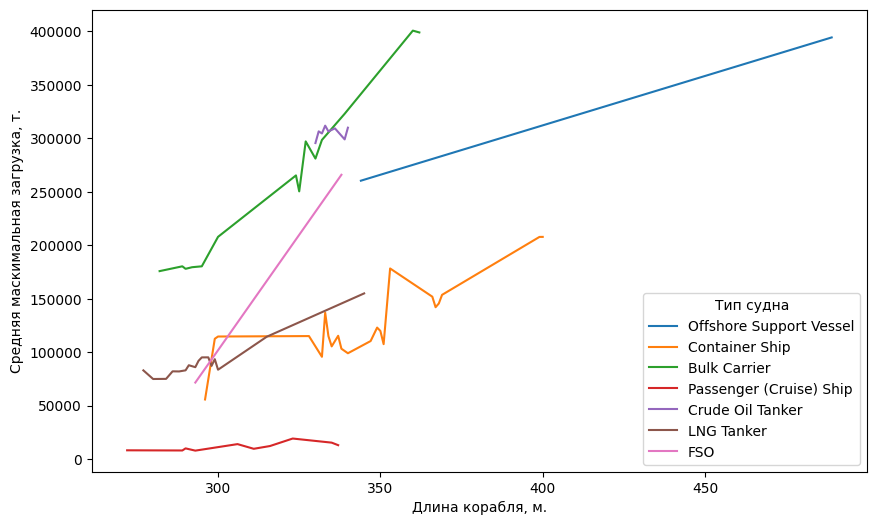

In [2]:
file = pd.read_csv("Cleaned_ships_data.csv")
plt.figure(figsize=(10,6))
plt.xlabel("Длина корабля, м.")
plt.ylabel("Средняя маскимальная загрузка, т.")
sb.lineplot(x="length", y="dwt", hue = "ship_name", data=file, ci = None)
plt.legend(title = "Тип судна")
plt.show()

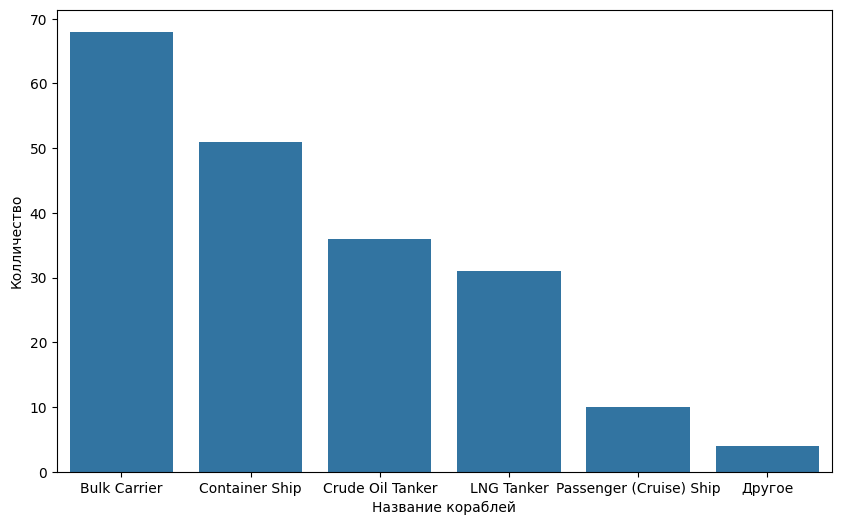

In [3]:
counts=file["ship_name"].value_counts()
min_amount = 10
df = file["ship_name"].apply(lambda x: "Другое" if counts[x] < min_amount else x).value_counts().reset_index()
plt.figure(figsize=(10,6))
plt.xlabel("Название кораблей")
plt.ylabel("Колличество")
sb.barplot(x="ship_name", y="count", data=df)
plt.show()


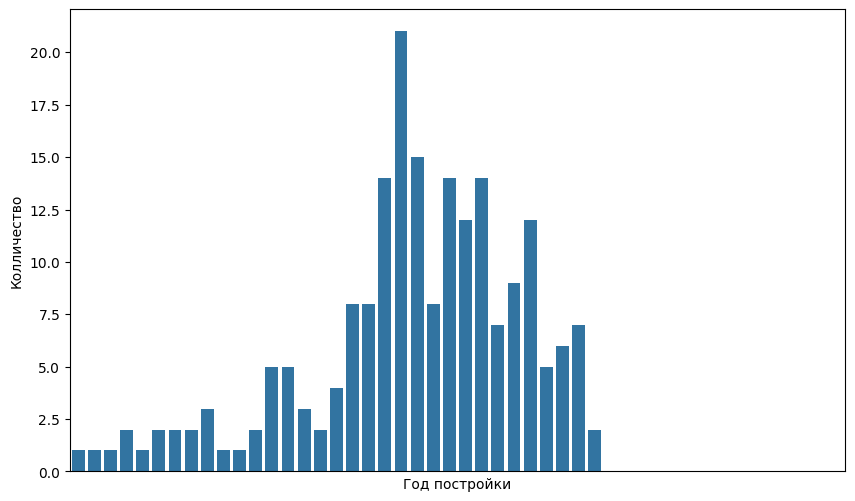

In [4]:
df = file["built_year"].value_counts().reset_index()
plt.figure(figsize=(10,6))

# Set the x-axis tick labels to a range of years
years = list(range(df["built_year"].min(), df["built_year"].max()+1))
plt.xticks(years)

# Set the x-axis limits to the range of years
plt.xlim(years[0], years[-1])

plt.xlabel("Год постройки")
plt.ylabel("Колличество")
sb.barplot(x="built_year", y="count", data=df)
plt.show()

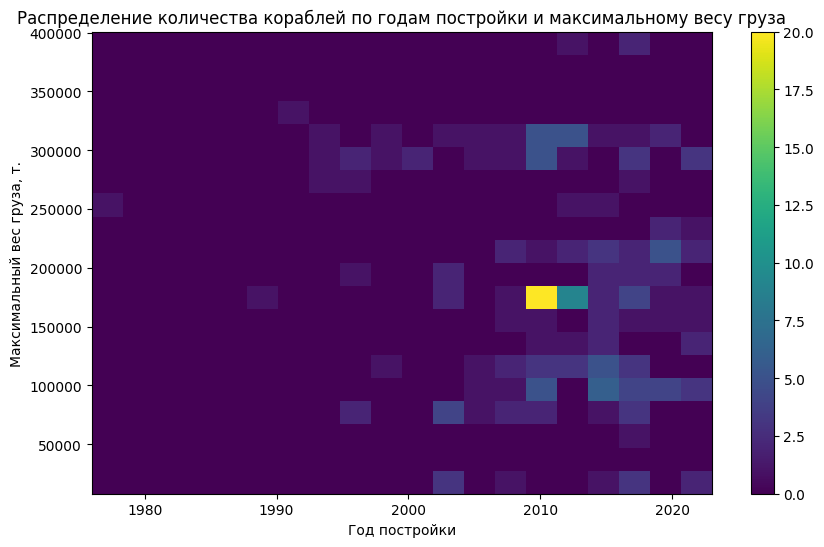

In [5]:
df = file[["built_year",  "dwt"]]
plt.figure(figsize=(10,6))
plt.xlabel("Год постройки")
plt.ylabel("Максимальный вес груза, т.")
plt.title("Распределение количества кораблей по годам постройки и максимальному весу груза")
plt.hist2d(df["built_year"], df["dwt"], bins=20)
plt.colorbar()
plt.show()

<Figure size 1000x600 with 0 Axes>

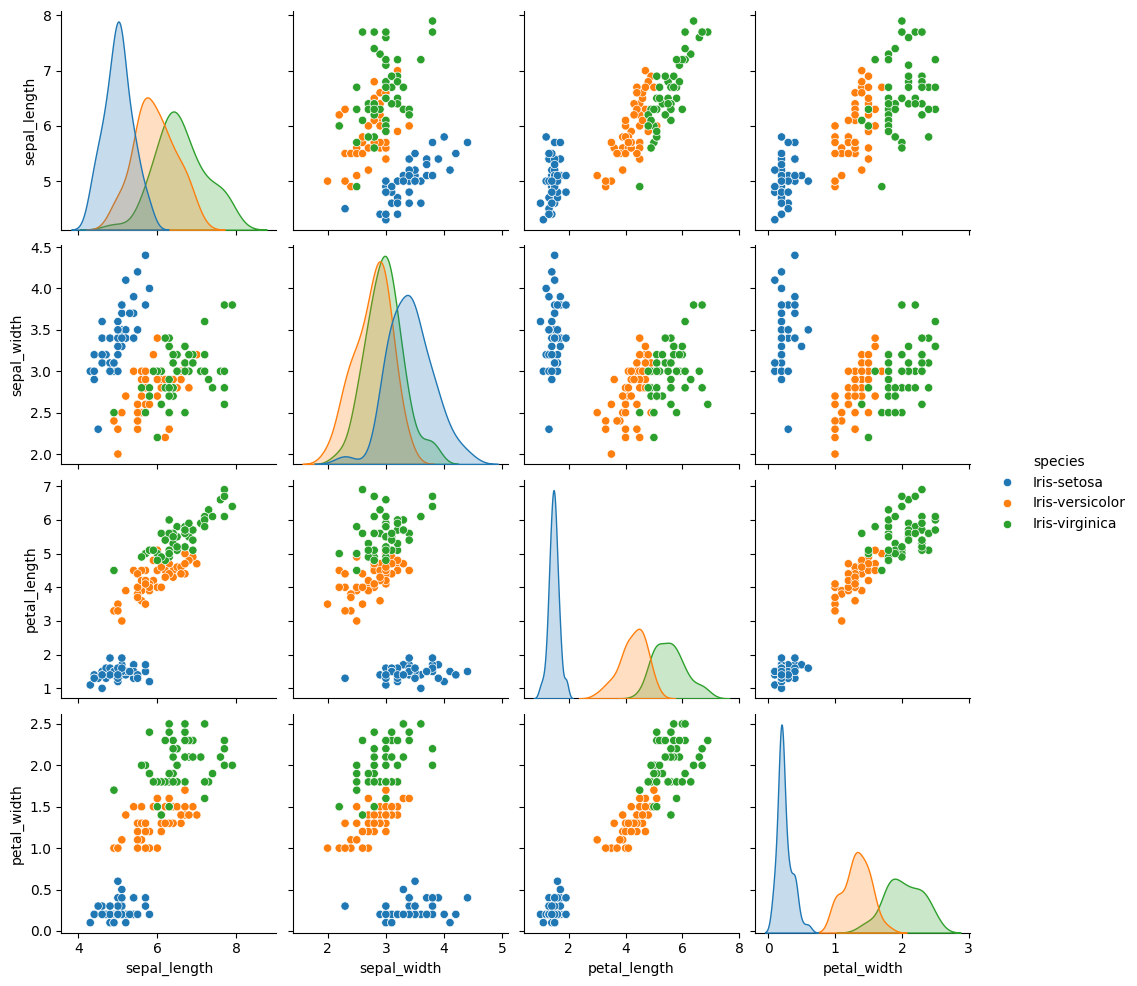

In [6]:
file2 = pd.read_csv("IRIS.csv")
plt.figure(figsize=(10,6))
sb.pairplot(file2, hue="species")

<Axes: xlabel='Виды растений', ylabel='Длина чашелистика'>

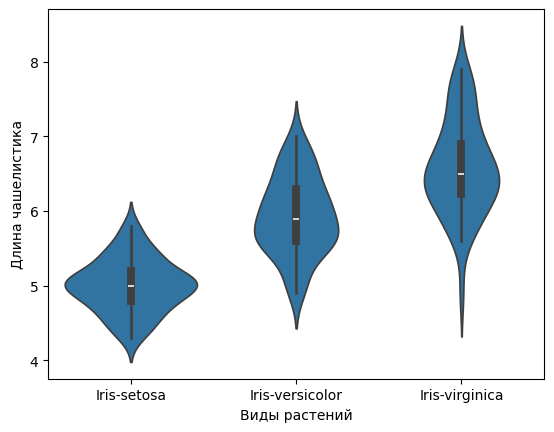

In [7]:
plt.ylabel("Длина чашелистика")
plt.xlabel("Виды растений")
sb.violinplot(file2, x = file2.columns[4], y = file2.columns[0])

<Axes: xlabel='Виды растений', ylabel='Ширина чашелистика'>

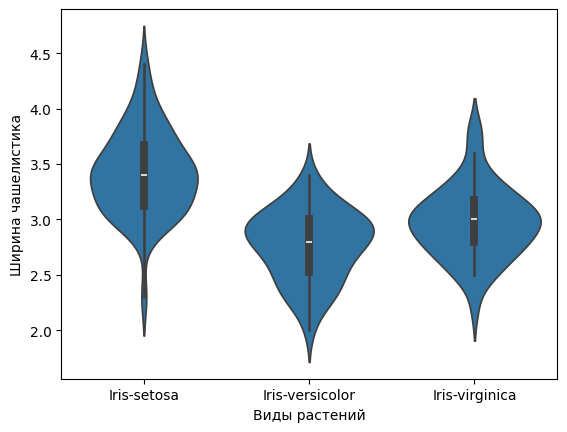

In [8]:
plt.ylabel("Ширина чашелистика")
plt.xlabel("Виды растений")
sb.violinplot(file2, x = file2.columns[4], y = file2.columns[1])

<Axes: xlabel='Виды растений', ylabel='Длина лепестка'>

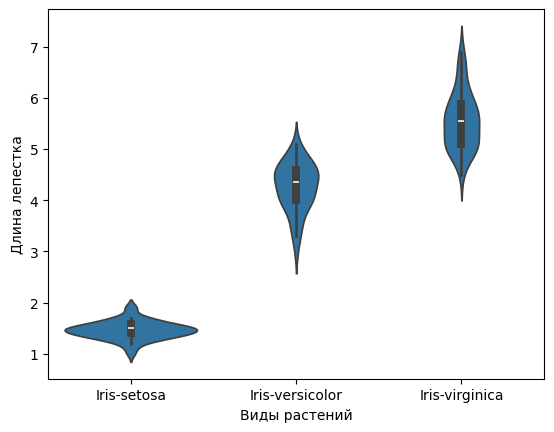

In [9]:
plt.ylabel("Длина лепестка")
plt.xlabel("Виды растений")
sb.violinplot(file2, x = file2.columns[4], y = file2.columns[2])

<Axes: xlabel='Виды растений', ylabel='Ширина лепестка'>

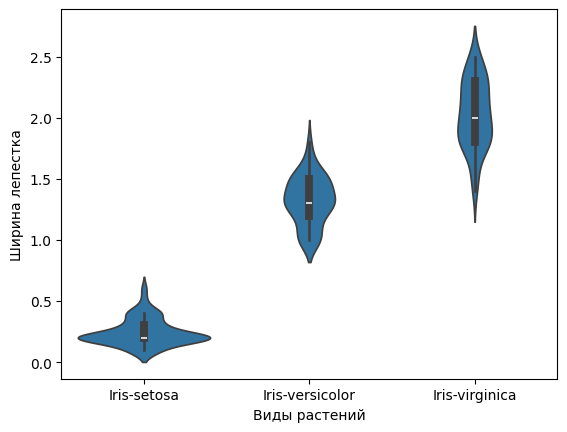

In [10]:
plt.ylabel("Ширина лепестка")
plt.xlabel("Виды растений")
sb.violinplot(file2, x = file2.columns[4], y = file2.columns[3])

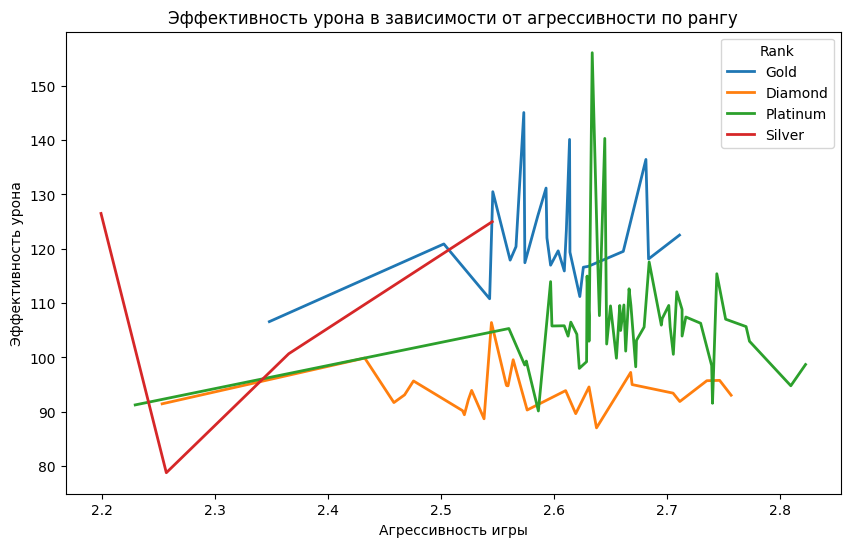

In [37]:
file3 = pd.read_csv("Pubg_Stats.csv")
df = file3
df['Damage_Efficiency'] = file3['Damage_Dealt'] / file3['Deaths']
df['Aggressiveness'] = file3['Kills'] / file3['Matches_Played']

# Create the scatter plot with Seaborn
plt.figure(figsize=(10, 6))
sb.lineplot(x='Aggressiveness', y='Damage_Efficiency', hue='Rank', data=df, 
            errorbar=None, linewidth=2)

# Add title and labels
plt.title('Эффективность урона в зависимости от агрессивности по рангу')

plt.xlabel('Агрессивность игры')

plt.ylabel('Эффективность урона')


# Show the plot
plt.show()

Исходя из этого графика, можно сделать вывод, что чем больше урона нанесет игрок тем выше шанс победить в игре.

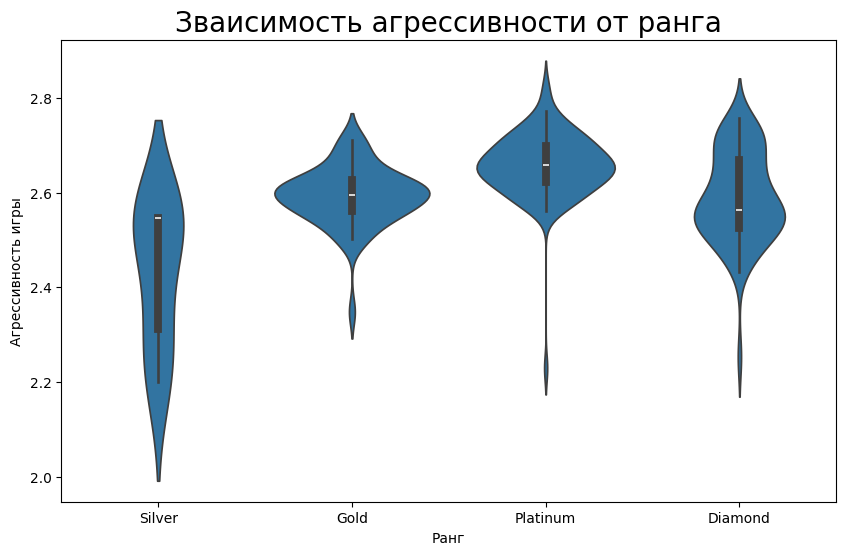

In [59]:
df = file3
# Use Seaborn's scatterplot function to create the plot
plt.figure(figsize=(10, 6))
sb.violinplot(data = df, x = df["Rank"], y = file3['Kills'] / file3['Matches_Played'], order=["Silver", "Gold", "Platinum", "Diamond"])  # edge color: black

# Add title and labels
plt.title('Зваисимость агрессивности от ранга', fontsize=20)  # Title: Time Survived and Number of Kills
plt.xlabel('Ранг')  # x-axis label: Kills
plt.ylabel('Агрессивность игры')  # y-axis label: Time Survived

# Show the plot
plt.show()

Кол-во побед напрямую зависит от ранга, соответсвенно от скилла(в целом очевидно, но надо было проверить)

<Figure size 1000x600 with 0 Axes>

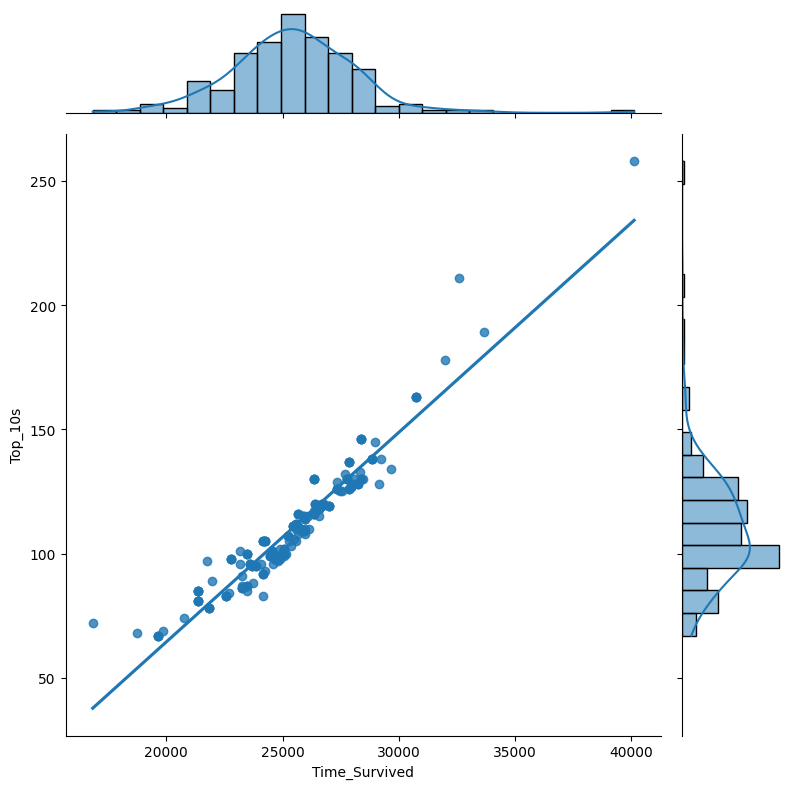

In [86]:
plt.figure(figsize=(10,6))
sb.jointplot(x="Time_Survived", y="Top_10s", data=file3, kind="reg", height=8, ci = None)
plt.show()

Здесь можно заметить, что в начале пути, игроки занимают топ-10 чаще чем те, кто уже отыграл какое то время, но потом тенденция роста - чем больше времени выжил, тем чаще занимал топ-10.